successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
Skipping image, no lines found.
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful
successful


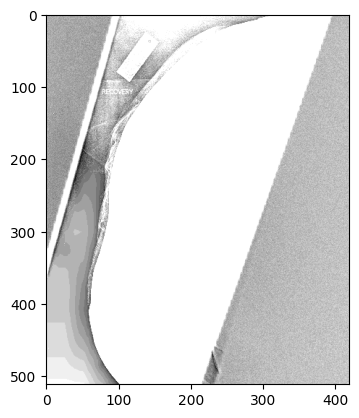

In [1]:
import hough
import cv2
import matplotlib.pyplot as plt
import os


folder_path = '/home/clr/Thesis/pre-processing/Humerus/'  
n=100 #number of images u want to process in the folder 
image_output, skipped_images = hough.hough_transform(folder_path,n)

In [2]:
image_files = os.listdir(folder_path)


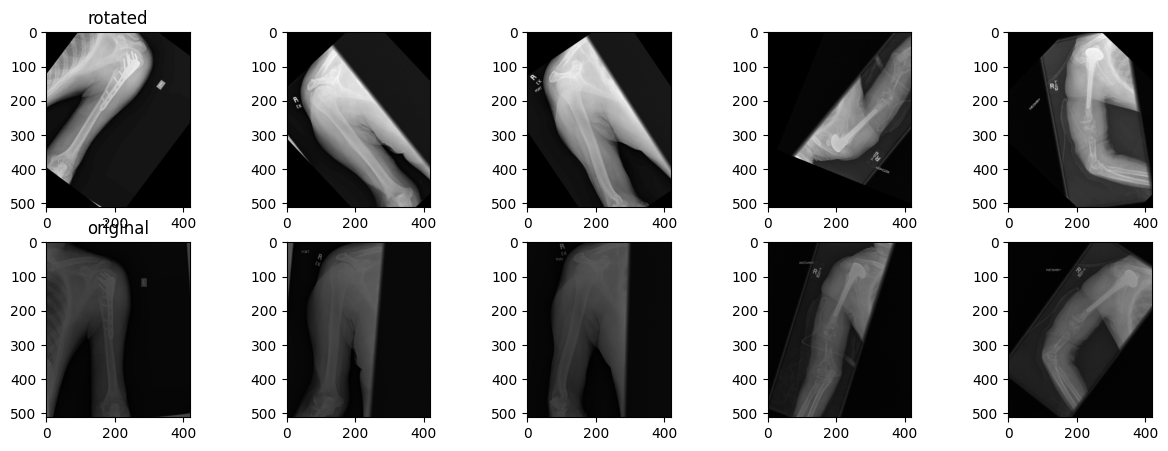

In [3]:
fig, ax = plt.subplots(2, 5, figsize=(15, 5))
ax[0][0].imshow(image_output[0], cmap='gray')
ax[0][0].set_title("rotated")
ax[0][1].imshow(image_output[1], cmap='gray')
ax[0][2].imshow(image_output[2], cmap='gray')
ax[0][3].imshow(image_output[3], cmap='gray')
ax[0][4].imshow(image_output[4], cmap='gray')
ax[1][0].imshow(cv2.imread(folder_path+image_files[0]), cmap='gray')
ax[1][0].set_title("original")
ax[1][1].imshow(cv2.imread(folder_path+image_files[1]), cmap='gray')
ax[1][2].imshow(cv2.imread(folder_path+image_files[2]), cmap='gray')
ax[1][3].imshow(cv2.imread(folder_path+image_files[3]), cmap='gray')
ax[1][4].imshow(cv2.imread(folder_path+image_files[4]), cmap='gray')

Rotation with box

In [4]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io
import os
import PIL
from skimage.filters import threshold_otsu, sobel


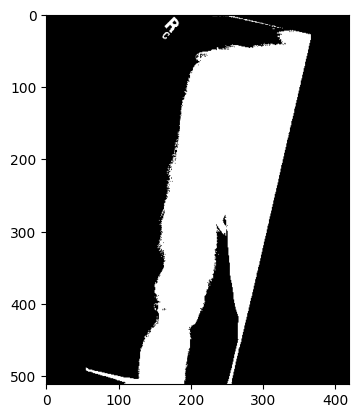

In [158]:
# image_path = "/home/clr/Thesis/pre-processing/Humerus/MURA-v1.1-train-XR_HUMERUS-patient00246-study1_negative-image1.png"
image_path = "/home/clr/Thesis/pre-processing/Humerus/MURA-v1.1-train-XR_HUMERUS-patient02708-study1_positive-image1.png"
im_gray = np.array(Image.open(image_path).convert('L'))

threshold = threshold_otsu(im_gray)
threshold -= threshold*0.20
bina_image = im_gray < threshold
inverted_bina_image = np.logical_not(bina_image)

# Convert the inverted binary image (numpy array) to a Pillow Image object
inverted_binary_image_pil = Image.fromarray(np.uint8(inverted_bina_image) * 255)
plt.imshow(inverted_binary_image_pil, cmap='gray')

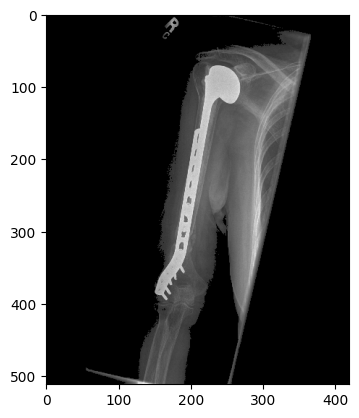

In [159]:
#removed image background after thresholding
background_removed_image = np.zeros_like(im_gray)
background_removed_image[inverted_bina_image] = im_gray[inverted_bina_image]
background_removed_image_pil = Image.fromarray(background_removed_image)

plt.imshow(background_removed_image_pil, cmap='gray')

[[ 52.85804  498.30063 ]
 [171.5542   -17.090536]
 [367.2417    27.976898]
 [248.54553  543.36804 ]]


/tmp/ipykernel_59851/2391161670.py:25: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  cv2.drawContours(drawn_image, [np.int0(best_rect)], 0, (255, 255, 255), -1)


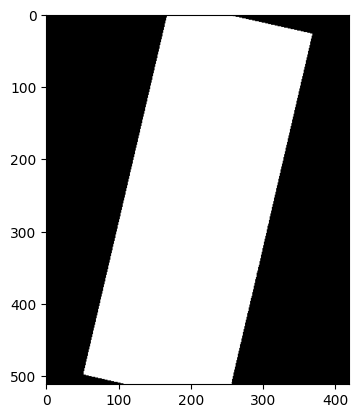

In [160]:


# Assuming you have already thresholded binary image 'inverted_bina_image'

# Find contours in the binary image
contours, _ = cv2.findContours(np.uint8(inverted_bina_image), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

best_rect = None
best_rect_area = 0

# Iterate through all contours and find the best fitting rectangle
for contour in contours:
    # Fit a rotated rectangle around the contour
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box_area = rect[1][0] * rect[1][1]

    # Check if the current rectangle has larger area than the previous best
    if box_area > best_rect_area:
        best_rect = box
        best_rect_area = box_area

print(best_rect)
# Draw the rotated rectangle on the original image
original_image = np.array(inverted_binary_image_pil)
drawn_image = original_image.copy()
cv2.drawContours(drawn_image, [np.int0(best_rect)], 0, (255, 255, 255), -1)

# Show the final image with the enclosing rotated rectangle
plt.imshow(drawn_image, cmap='gray')
plt.show()

/tmp/ipykernel_59851/2644506616.py:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  cv2.drawContours(drawn_image, [np.int0(best_rect)], 0, (255, 255, 255), -1)  # Filled rectangle with white


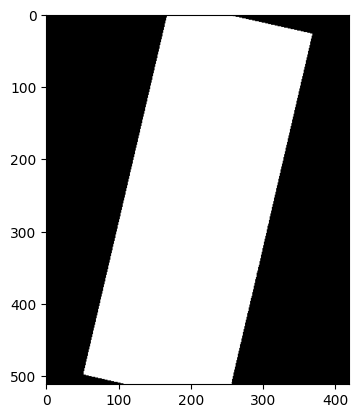

In [161]:


# Draw the rotated rectangle on the original image
original_image = np.array(inverted_binary_image_pil)
drawn_image = original_image.copy()
cv2.drawContours(drawn_image, [np.int0(best_rect)], 0, (255, 255, 255), -1)  # Filled rectangle with white

# Show the final image with the enclosing rotated rectangle
plt.imshow(drawn_image, cmap='gray')
plt.show()


(210, 256)


/tmp/ipykernel_59851/1905920070.py:15: RuntimeWarning: invalid value encountered in sqrt
  length = np.sqrt((x2 - x1)^2 + (y2 - y1)^2)


Text(0.5, 1.0, 'Detected Lines')

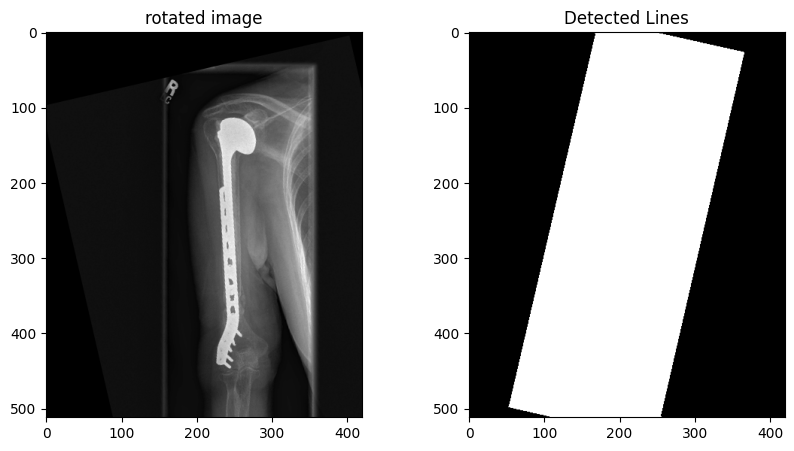

In [162]:

edges = cv2.Canny(drawn_image, 50, 150, apertureSize=3)
lines_list =[]

lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=100, # Min number of votes for valid line
            minLineLength=5, # Min allowed length of line
            maxLineGap=5 # Max allowed gap between line for joining them
            )
for points in lines:
    # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    length = np.sqrt((x2 - x1)^2 + (y2 - y1)^2)
    # Draw the lines joing the points
    # On the original image
    cv2.line(drawn_image,(x1,y1),(x2,y2),(0,255,0),2)
    # Maintain a simples lookup list for points
    # lines_list[0].append([(x1,y1),(x2,y2)])
    lines_list.append(length) #get the length of the line 

longest_line = max(lines_list)
longest_line_index = lines_list.index(longest_line)
longest_line = lines[longest_line_index][0]

angle_radians = np.arctan2(longest_line[3] - longest_line[1], longest_line[2] - longest_line[0])
angle_degrees = np.degrees(angle_radians)
# angles = [line[0][1] for line in lines]
# # angle_max = max(angles)
# print(angles)

# # do not get the max angle, get the longest line 
# average_angle = np.degrees(np.mean(angles))

# average_angle = average_angle - (average_angle*0.50) 
# # print("average angle",average_angle)

img_original = cv2.imread(image_path)
height, width = img_original.shape[:2]
center = (width // 2, height // 2)
print(center)
rotation_matrix = cv2.getRotationMatrix2D(center, angle_degrees, 1) #1 is image zoom
rotated_image = cv2.warpAffine(im_gray, rotation_matrix, (height,width))

rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_COUNTERCLOCKWISE)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(rotated_image, cmap='gray')
ax[0].set_title("rotated image")
ax[1].imshow(drawn_image, cmap='gray')
ax[1].set_title("Detected Lines")

rotation 

In [46]:
import cv2
import numpy as np

def subimage(image, center, theta, width, height):

   ''' 
   Rotates OpenCV image around center with angle theta (in deg)
   then crops the image according to width and height.
   '''

   # Uncomment for theta in radians
   # theta *= 180/np.pi

   shape = ( image.shape[0], image.shape[1] ) # cv2.warpAffine expects shape in (length, height)

   matrix = cv2.getRotationMatrix2D( center=center, angle=theta, scale=1 )
   image = cv2.warpAffine( src=image, M=matrix, dsize=shape )

   # x = int( center[0] - width//2  ) 
   # y = int( center[1] - height//2 )

   # image = image[ y:y+height, x:x+width ]

   return image


In [49]:
image_path = "/home/clr/Thesis/houghTransform/sample images/image2.png"

img= cv2.imread(image_path)


# Find the two sides of the rectangle
side1 = np.linalg.norm(best_rect[0] - best_rect[1])
side2 = np.linalg.norm(best_rect[1] - best_rect[2])

# Determine which side is the length and which side is the width
length = max(side1, side2)
width = min(side1, side2)
length = int(length)
width = int(width)

print("Length of the box:", length)
print("Width of the box:", width)
center = (height // 2, width // 2)

print("center", center)
image = subimage(drawn_image, center=center, theta=80, width=width, height=height)


cv2.imwrite('/home/clr/Thesis/houghTransform/patch4.jpg', drawn_image)

Length of the box: 477
Width of the box: 227
center (256, 113)


True

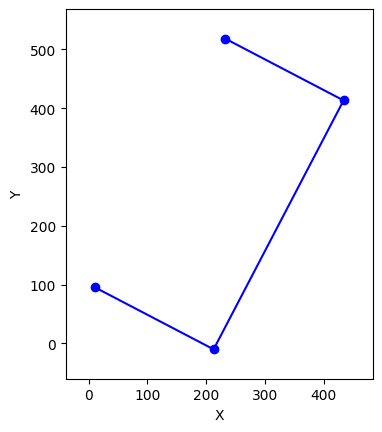

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Given rectangle points
rectangle_points = np.array([[11.007858, 95.06073],
                             [212.65485, -10.236176],
                             [433.7093, 413.0903],
                             [232.06232, 518.3872]])

# Plot the rectangle
plt.plot(rectangle_points[:, 0], rectangle_points[:, 1], 'bo-')

# Set axis limits
plt.xlim(rectangle_points[:, 0].min() - 50, rectangle_points[:, 0].max() + 50)
plt.ylim(rectangle_points[:, 1].min() - 50, rectangle_points[:, 1].max() + 50)

# Add labels
plt.xlabel('X')
plt.ylabel('Y')

# Show the plot
plt.gca().set_aspect('equal')
plt.show()
